In [1]:
using CSV, DataFrames, Plots, Statistics, StatsPlots, Dates, StatsBase
total_df = CSV.read("accepted_2007_to_2018Q4.csv")
size(total_df)

UndefVarError: UndefVarError: df not defined

## Cleaning

In [26]:
df = total_df[sample(axes(total_df,1), 100000; replace=false, ordered=true), :];

In [27]:
for i in names(df)
    println(i)
end

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [28]:
first(df, 5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
,String,Missing,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰
1,68607141,missing,17600.0,17600.0,17600.0,36 months,5.32
2,68407333,missing,16250.0,16250.0,16250.0,60 months,13.44
3,68393340,missing,13150.0,13150.0,13150.0,36 months,5.32
4,66405419,missing,12600.0,12600.0,12600.0,60 months,14.85
5,68606972,missing,30000.0,30000.0,30000.0,60 months,18.49


In [29]:
columns = [:loan_amnt, :issue_d, :term, :int_rate, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [30]:
data = df[:, columns];

In [31]:
for col in columns
    println(col, ": ", sum(ismissing.(data[:, col])))
end

loan_amnt: 1
issue_d: 1
term: 1
int_rate: 1
installment: 1
grade: 1
sub_grade: 1
emp_title: 7348
emp_length: 6455
home_ownership: 1
annual_inc: 1
pymnt_plan: 1
purpose: 1
title: 1020
zip_code: 1
addr_state: 1
dti: 58
delinq_2yrs: 3
earliest_cr_line: 3
inq_last_6mths: 3
mths_since_last_delinq: 51151
mths_since_last_record: 84067
open_acc: 3
pub_rec: 3
total_acc: 3
total_pymnt: 1
total_pymnt_inv: 1
recoveries: 1
last_pymnt_d: 75
last_pymnt_amnt: 1
next_pymnt_d: 59400
last_credit_pull_d: 3
annual_inc_joint: 94619
dti_joint: 94619
acc_now_delinq: 3
tot_coll_amt: 3126
tot_cur_bal: 3126
open_acc_6m: 38362
acc_open_past_24mths: 2264
delinq_amnt: 3


In [32]:
required = [:loan_amnt, :term, :int_rate, :installment, :grade,
            :sub_grade, :home_ownership, :annual_inc, :pymnt_plan,
            :zip_code, :addr_state, :dti, :issue_d, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :open_acc, :pub_rec,
            :total_acc, :total_pymnt, :total_pymnt_inv, :recoveries,
            :last_pymnt_amnt, :last_credit_pull_d, :acc_now_delinq, :delinq_amnt];

In [33]:
data = dropmissing(data, required);

In [34]:
describe(data)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,loan_amnt,15041.5,500.0,12950.0,40000.0
2,issue_d,,Apr-2008,,Sep-2018
3,term,,36 months,,60 months
4,int_rate,13.0564,5.31,12.62,30.99
5,installment,445.838,7.61,378.2,1714.54
6,grade,,A,,G
7,sub_grade,,A1,,G5
8,emp_title,,Maintenance,,zone merchandise supervisor
9,emp_length,,1 year,,< 1 year


In [35]:
data[!, :issue_d] = Date.(data[:, :issue_d], Dates.DateFormat("u-y"));

In [36]:
features = [:loan_amnt, :issue_d, :term, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [38]:
viz = by(data, [:issue_d, :grade], :int_rate => x -> sum(x)/size(x, 1))
viz = sort(viz, [:issue_d, :grade]);

In [39]:
x_vals = unique(Dates.year.(viz[:, :issue_d]));
x_dates = Date.(x_vals);

In [95]:
for col in columns
    if sum(ismissing.(data[:, col])) > 0
        println(col, ": ", sum(ismissing.(data[:, col])))
    end
end

emp_title: 7291
emp_length: 6400
title: 1019
mths_since_last_delinq: 51105
mths_since_last_record: 84012
last_pymnt_d: 74
next_pymnt_d: 59385
annual_inc_joint: 94614
dti_joint: 94614
tot_coll_amt: 3123
tot_cur_bal: 3123
open_acc_6m: 38358
acc_open_past_24mths: 2261


## Feature Transformations

In [96]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), size(cats, 1))
    for i in 1:size(cats, 1)
        for j in 1:size(column, 1)
            if cats[i] == column[j]
                result[j, i] = 1
            end
        end
    end
    result
end

function manyhot(column, cats=unique(col))
    result = zeros(size(column, 1), size(cats, 1))
    for i in 1:size(column, 1)
        set_of_descriptions = column[i]
        for description in set_of_descriptions
            for j in 1:size(cats, 1)
                if description == cats[j]
                    result[i, j] = 1
                end
            end
        end
    end
    result
end

manyhot (generic function with 2 methods)

In [98]:
onehot(data[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])

99938×7 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮       
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0

## Visualizations

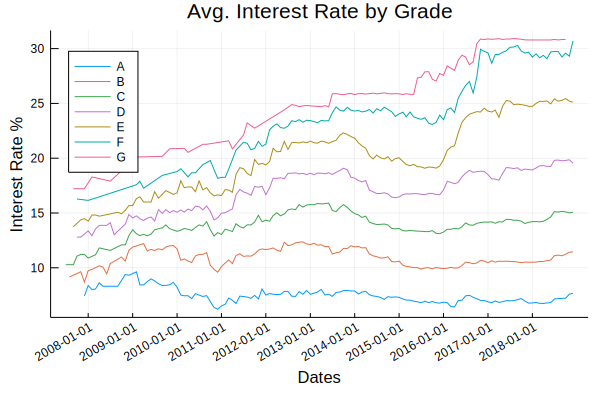

In [40]:
@df viz plot(:issue_d, :int_rate_function, group=:grade, xrotation=30, legend=:topleft, xticks=x_dates, xlabel="Dates", ylabel="Interest Rate %", title="Avg. Interest Rate by Grade")

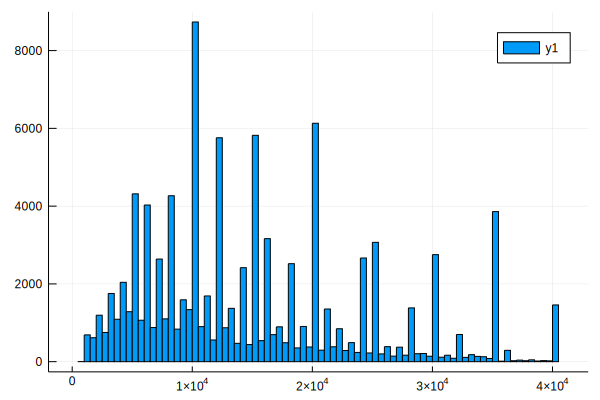

In [41]:
@df data histogram(:loan_amnt)

In [42]:
rates = zeros(size(unique(data.addr_state), 1))
states = []
i = 1
for state in unique(data.addr_state)
    d = filter(row->row.addr_state == state, data)
    μ = mean(d.int_rate)
    rates[i] = μ
    push!(states, state)
    i += 1
end

In [43]:
size(states)

(51,)

In [44]:
size(rates)

(51,)

In [45]:
graph = hcat(states, rates);

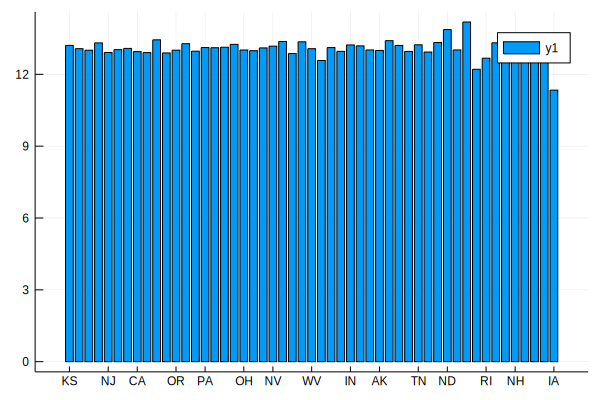

In [46]:
bar(states, rates)

In [47]:
zip_rates = zeros(size(unique(data.zip_code), 1))
zips = []
i = 1
for zip in unique(data.zip_code)
    d = filter(row->row.zip_code == zip, data)
    μ = mean(d.int_rate)
    zip_rates[i] = μ
    push!(zips, zip)
    i += 1
end

In [59]:
zips_graph = hcat(zips, zip_rates)
zips_graph = sort(DataFrame(zips_graph), :x2);

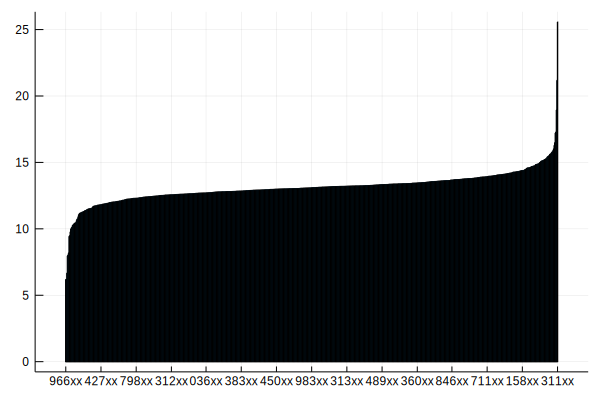

In [61]:
@df zips_graph bar(:x1, :x2, legend=false)

In [65]:
data = sort(data, :loan_amnt);

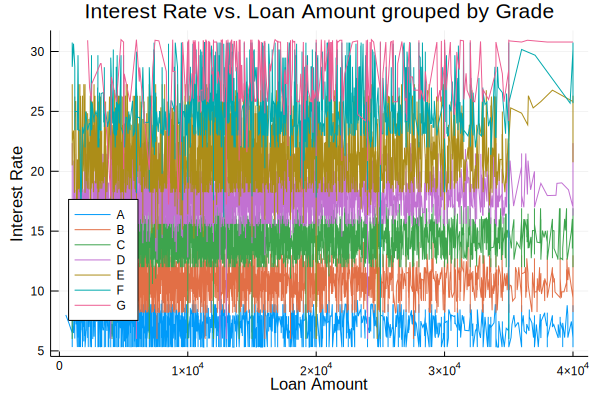

In [73]:
@df data plot(:loan_amnt, :int_rate, groups=:grade, legend=:bottomleft)
xlabel!("Loan Amount")
ylabel!("Interest Rate")
title!("Interest Rate vs. Loan Amount grouped by Grade")

## Preliminary Models

In [120]:
function MSE(y, pred)
    return mean((y .- pred) .^ 2)
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:red, legend=:topleft)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000; zeromin=true)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted", "True", zeromin=zeromin)
end

plot_pred_true

In [37]:
X = data[:, features]
Y = data[:, :int_rate];

In [86]:
split = floor(Int, size(X, 1) * 0.8)
X_train = X[1:split, :]
X_test = X[split+1:end, :]
Y_train = Y[1:split, :]
Y_test = Y[split+1:end, :];

In [106]:
println(size(X_train))
println(size(X_test))

(79950, 39)
(19988, 39)


Train MSE	2.1229071151384846
Test MSE 	2.153578709106774


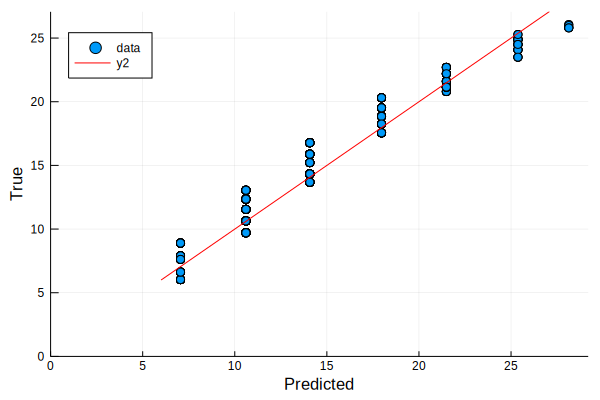

In [113]:
w_grades = hcat(ones(size(X_train, 1)), onehot(X_train[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) \ Y_train

train_grades_pred = hcat(ones(size(X_train, 1)), onehot(X_train[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) * w_grades
test_grades_pred = hcat(ones(size(X_test, 1)), onehot(X_test[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) * w_grades

train_MSE = MSE(Y_train, train_grades_pred)
test_MSE = MSE(Y_test, test_grades_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_grades_pred, Y_test)

Train MSE	22.752975219569155
Test MSE 	24.32297624261046


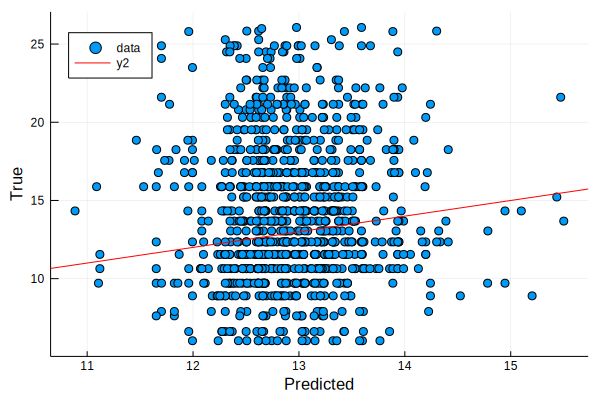

In [121]:
X_zips = onehot(X[:, :zip_code])
X_zips_train = X_zips[1:split, :]
X_zips_test = X_zips[split+1:end, :]

w_zips = hcat(ones(size(X_zips_train, 1)), X_zips_train) \ Y_train

train_zips_pred = hcat(ones(size(X_zips_train, 1)), X_zips_train) * w_zips
test_zips_pred = hcat(ones(size(X_zips_test, 1)), X_zips_test) * w_zips

train_MSE = MSE(Y_train, train_zips_pred)
test_MSE = MSE(Y_test, test_zips_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_zips_pred, Y_test, zeromin=false)

Train MSE	22.78941214037308
Test MSE 	23.813451226590406


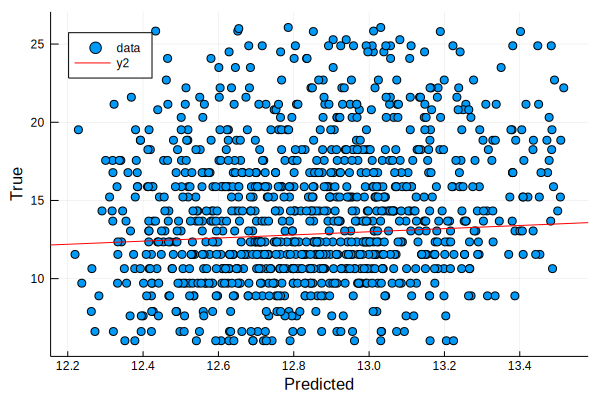

In [122]:
w_dti = hcat(ones(size(X_train, 1)), X_train[:, :dti]) \ Y_train

train_dti_pred = hcat(ones(size(X_train, 1)), X_train[:, :dti]) * w_dti
test_dti_pred = hcat(ones(size(X_test, 1)), X_test[:, :dti]) * w_dti

train_MSE = MSE(Y_train, train_dti_pred)
test_MSE = MSE(Y_test, test_dti_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_dti_pred, Y_test, zeromin=false)